### Изучение нейронных сетей. Лаб.2.2.

Files already downloaded and verified
Files already downloaded and verified


/home/sbaykov/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:83: UserWarning: 
    Found GPU%d %s which is of cuda capability %d.%d.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is %d.%d.
    
  warnings.warn(old_gpu_warn.format(d, name, major, minor, min_arch // 10, min_arch % 10))
/home/sbaykov/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Learning rate = 0.20100000000000015
[1,   200] loss: 2.304
Learning rate = 0.4010000000000003
[1,   400] loss: 2.304
Learning rate = 0.6010000000000004
[1,   600] loss: 2.304
Learning rate = 0.8010000000000006
[1,   800] loss: 2.303
Learning rate = 1.0010000000000006
[1,  1000] loss: 2.305
Learning rate = 1.2009999999999785
[1,  1200] loss: 2.303
Learning rate = 1.4009999999999565
[1,  1400] loss: 2.305
Finished Training
Working time: 4.750750303268433 seconds
Кривая обучения:


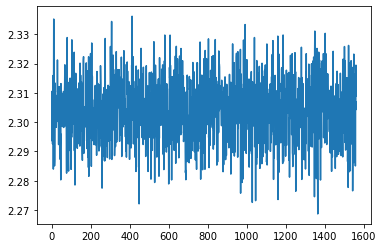

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, 
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)       #
        self.pool = nn.MaxPool2d(2, 2)        #
        self.conv2 = nn.Conv2d(6, 16, 5)      #
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #
        self.fc2 = nn.Linear(120, 84)         #
        self.fc3 = nn.Linear(84, 10)          #

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)    #
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()

learn_rate = 0.001
optimizer = optim.SGD(net.parameters(), lr=learn_rate, momentum=0.9) 

net.to(device)

start_time = time.time()

x = []
y = []
j = 0

for epoch in range(1):  # loop over the dataset multiple times
    optimizer = optim.SGD(net.parameters(), lr=learn_rate, momentum=0.9)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        optimizer = optim.SGD(net.parameters(), lr=learn_rate, momentum=0.9)
        learn_rate += 0.001
        
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #loss.backward()
        #optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print("Learning rate =", learn_rate)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

        x.append(j)
        y.append(loss.item())
        j += 1            

print('Finished Training')

print("Working time: %s seconds" % (time.time() - start_time))

print('Кривая обучения:')

plt.plot(x, y)
plt.show()